# Traffic Prediction

### Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as smi 
import pylab as py 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from yellowbrick.classifier import ROCAUC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error
from sklearn.metrics import classification_report
from tabulate import tabulate
from sklearn.metrics import confusion_matrix
import warnings
from sklearn.feature_selection import f_regression
warnings.simplefilter('ignore')

### Data Preprocesing

In [11]:
df = pd.read_csv(r'C:/Users/PC/Desktop/ML/Data/Traffic.csv')
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.strftime('%I %p')
df.head(5)

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Hour
0,2023-10-30 00:00:00,10,Tuesday,31,0,4,4,39,low,12 AM
1,2023-10-30 00:15:00,10,Tuesday,49,0,3,3,55,low,12 AM
2,2023-10-30 00:30:00,10,Tuesday,46,0,3,6,55,low,12 AM
3,2023-10-30 00:45:00,10,Tuesday,51,0,2,5,58,low,12 AM
4,2023-10-30 01:00:00,10,Tuesday,57,6,15,16,94,normal,01 AM


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Time               2976 non-null   datetime64[ns]
 1   Date               2976 non-null   int64         
 2   Day of the week    2976 non-null   object        
 3   CarCount           2976 non-null   int64         
 4   BikeCount          2976 non-null   int64         
 5   BusCount           2976 non-null   int64         
 6   TruckCount         2976 non-null   int64         
 7   Total              2976 non-null   int64         
 8   Traffic Situation  2976 non-null   object        
 9   Hour               2976 non-null   object        
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 232.6+ KB


In [54]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


In [55]:
df.mean()

Date           16.000000
CarCount       68.696573
BikeCount      14.917339
BusCount       15.279570
TruckCount     15.324933
Total         114.218414
dtype: float64

In [56]:
df.median()

Date           16.0
CarCount       64.0
BikeCount      12.0
BusCount       12.0
TruckCount     14.0
Total         109.0
dtype: float64

In [57]:
df.skew()

Date          0.000000
CarCount      0.295436
BikeCount     1.317477
BusCount      0.718089
TruckCount    0.398283
Total         0.304993
dtype: float64

In [58]:
df.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
Hour                 0
dtype: int64

In [59]:
df.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation', 'Hour'],
      dtype='object')

In [60]:
df.shape

(2976, 10)

### Exploratory Data Analysis

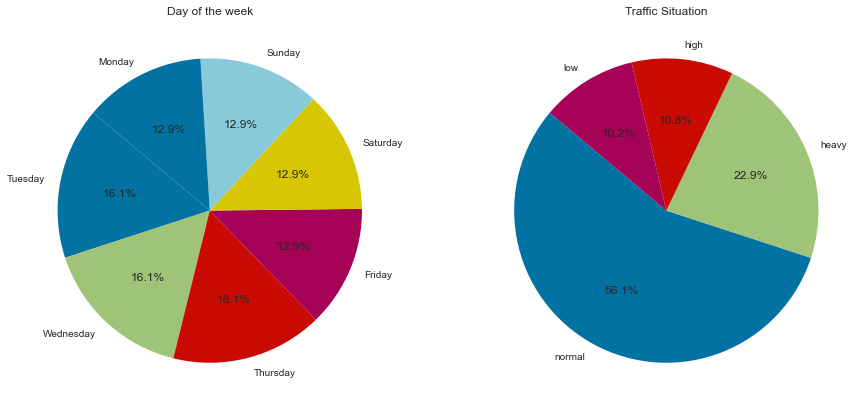

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

ax[0].pie(df['Day of the week'].value_counts(), labels=df['Day of the week'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[0].set_title('Day of the week')

ax[1].pie(df['Traffic Situation'].value_counts(), labels=df['Traffic Situation'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[1].set_title('Traffic Situation')

plt.show()

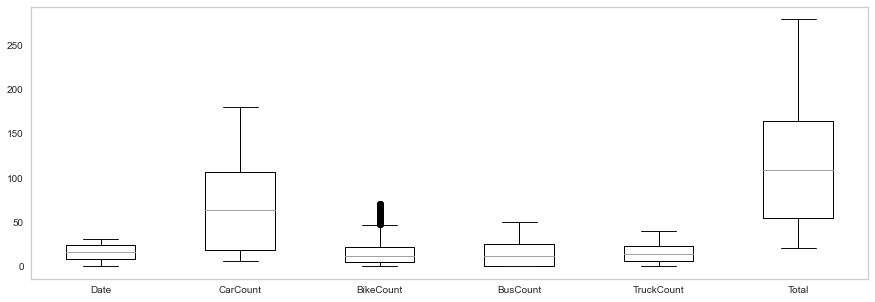

In [62]:
df.boxplot(figsize = (15,5), grid = False)
plt.show()

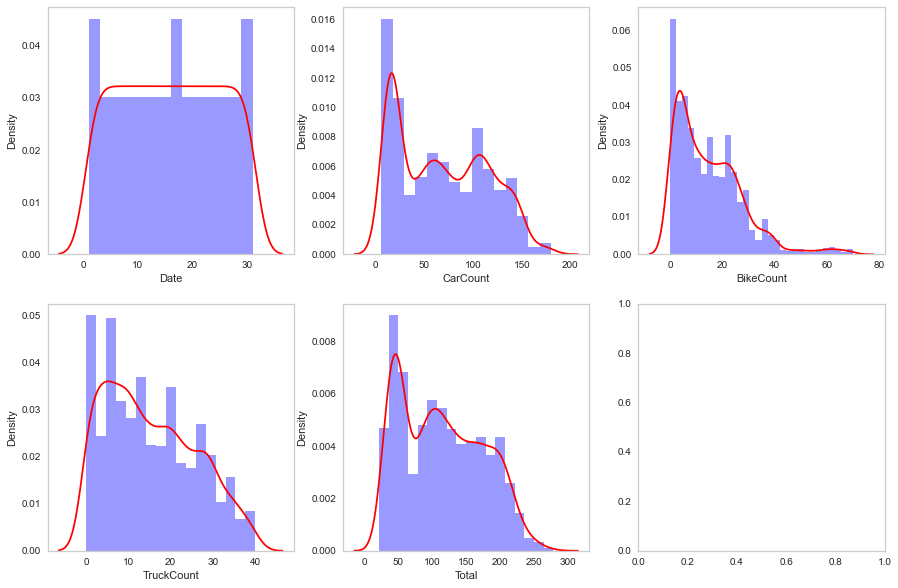

In [3]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

sns.distplot(df['Date'],ax=ax[0,0], color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['CarCount'],ax=ax[0,1],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['BikeCount'],ax=ax[0,2],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['TruckCount'],ax=ax[1,0],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Total'],ax=ax[1,1],  color = 'red', hist_kws={'color': 'blue'})

ax[0,0].grid(False)
ax[0,1].grid(False)
ax[0,2].grid(False)
ax[1,0].grid(False)
ax[1,1].grid(False)
ax[1,2].grid(False)

plt.show()

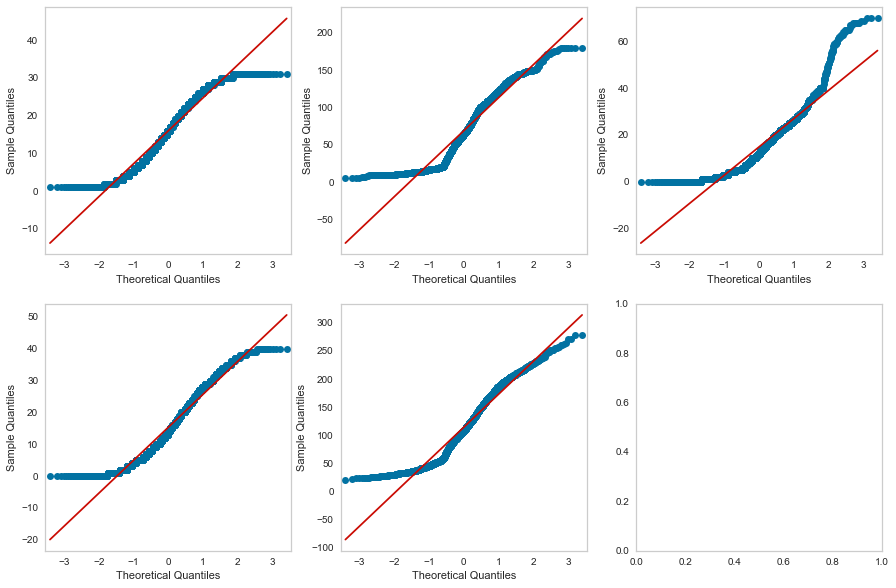

In [4]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

smi.qqplot(df['Date'],ax=ax[0,0], line="r")
smi.qqplot(df['CarCount'],ax=ax[0,1]  ,line="r")
smi.qqplot(df['BikeCount'],ax=ax[0,2],line="r")
smi.qqplot(df['TruckCount'],ax=ax[1,0],line="r")
smi.qqplot(df['Total'],ax=ax[1,1],line="r")

ax[0,0].grid(False)
ax[0,1].grid(False)
ax[0,2].grid(False)
ax[1,0].grid(False)
ax[1,1].grid(False)
ax[1,2].grid(False)

plt.show()

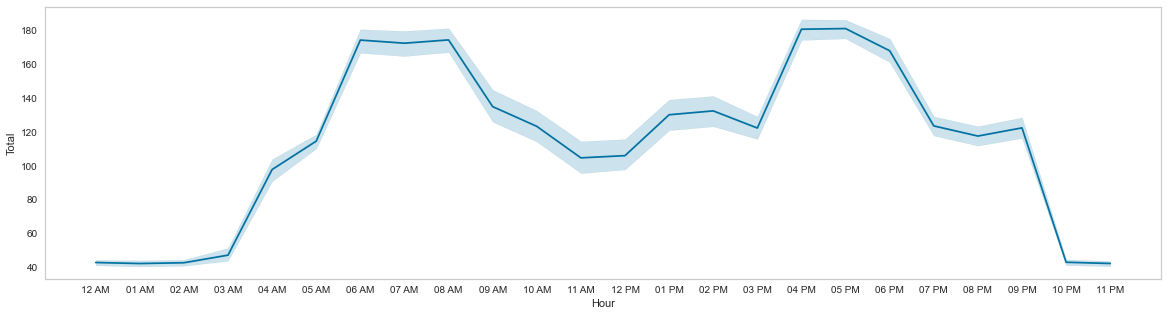

In [76]:
plt.figure(figsize=(20, 5))

sns.lineplot(data = df, x='Hour',y='Total')

plt.grid(False)

plt.show()

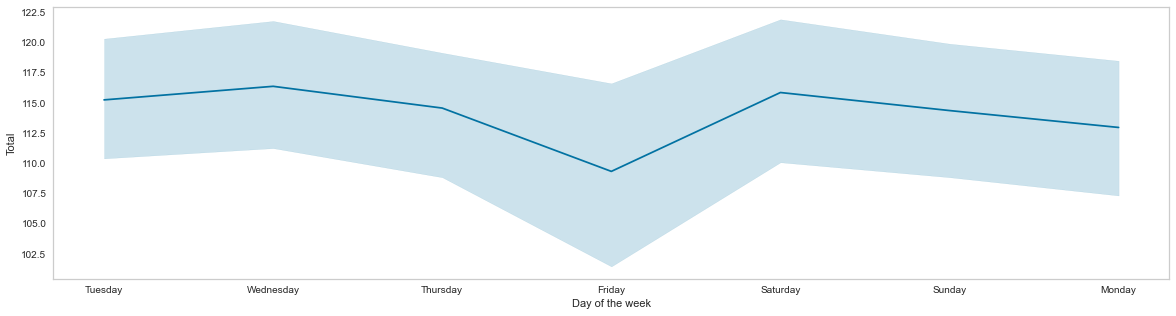

In [72]:
plt.figure(figsize=(20, 5))

sns.lineplot(data = df, x='Day of the week',y='Total')
plt.grid(False)

plt.show()

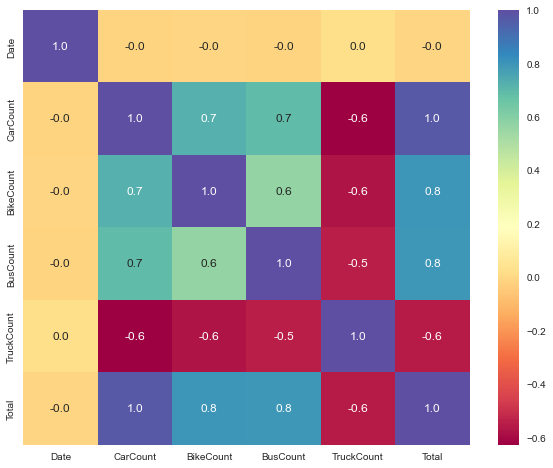

In [88]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True, fmt = '.1f', cmap = 'Spectral')
plt.show()

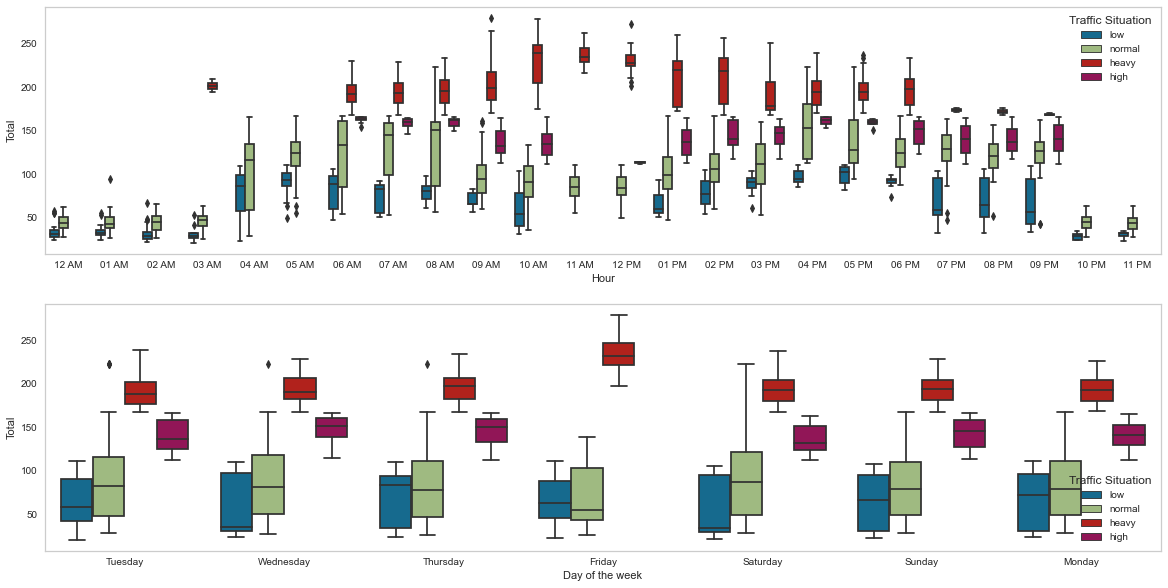

In [77]:
fig, ax = plt.subplots(2, 1, figsize=(20, 10))

sns.boxplot(data=df, y='Total', x='Hour', hue='Traffic Situation',ax = ax[0])
sns.boxplot(data=df, y='Total', x='Day of the week', hue='Traffic Situation',ax = ax[1])

ax[0].grid(False)
ax[1].grid(False)

plt.show()

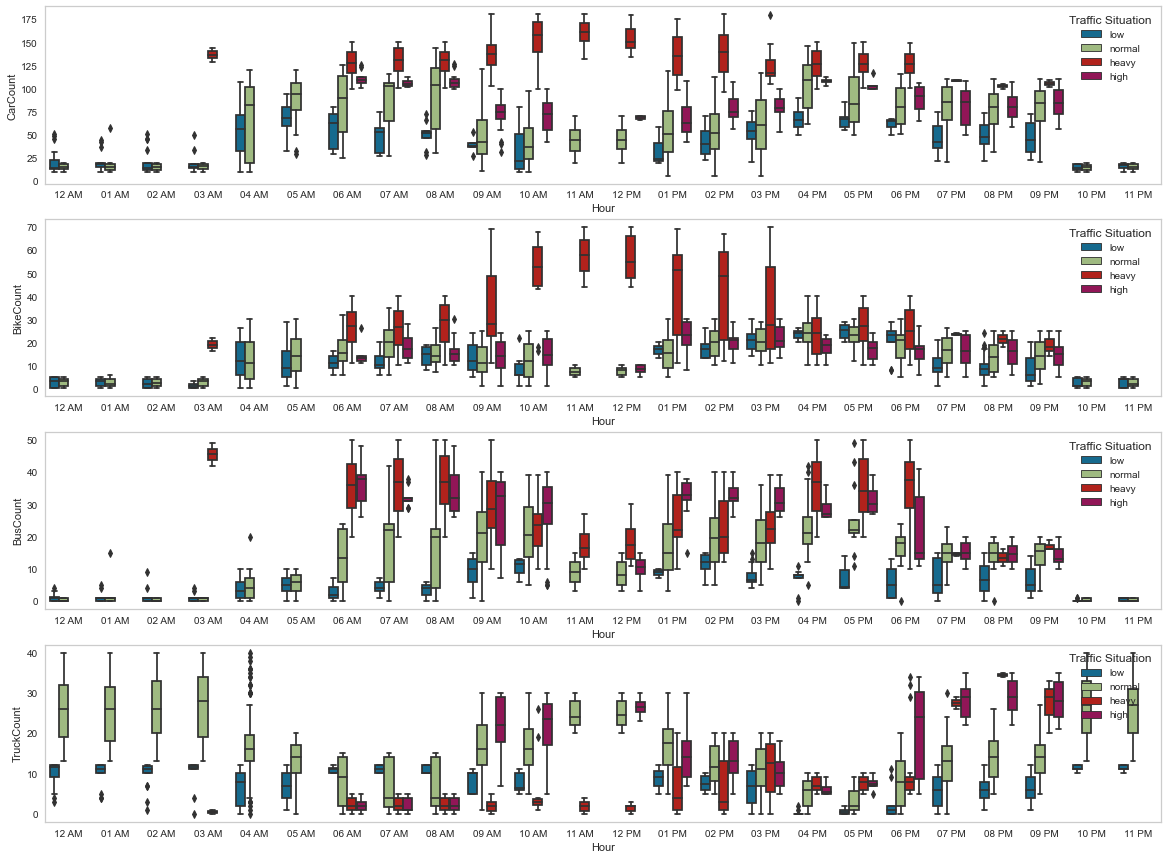

In [83]:
fig, ax = plt.subplots(4, 1, figsize=(20, 15))

sns.boxplot(data=df, y='CarCount', x='Hour', hue='Traffic Situation',ax = ax[0])
sns.boxplot(data=df, y='BikeCount', x='Hour', hue='Traffic Situation',ax = ax[1])
sns.boxplot(data=df, y='BusCount', x='Hour', hue='Traffic Situation',ax = ax[2])
sns.boxplot(data=df, y='TruckCount', x='Hour', hue='Traffic Situation',ax = ax[3])

ax[0].grid(False)
ax[1].grid(False)
ax[2].grid(False)
ax[3].grid(False)

plt.show()

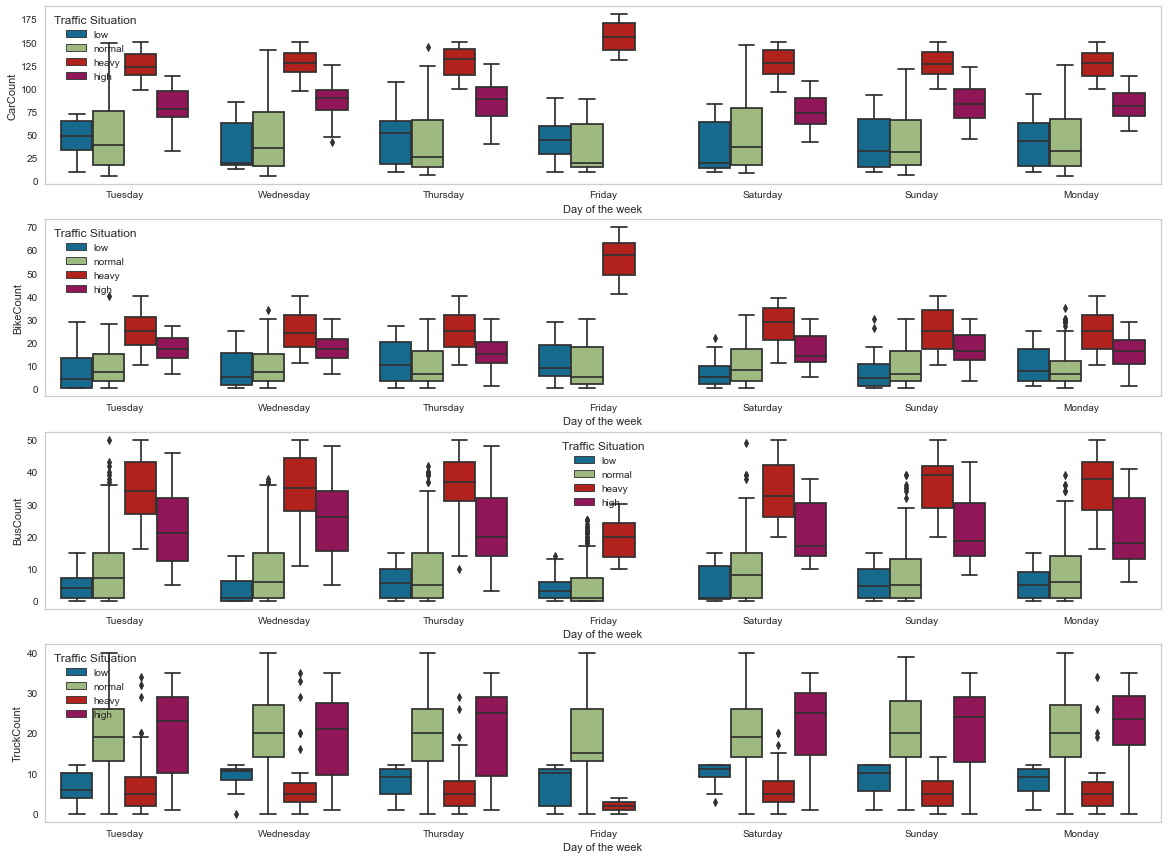

In [85]:
fig, ax = plt.subplots(4, 1, figsize=(20, 15))

sns.boxplot(data=df, y='CarCount', x='Day of the week', hue='Traffic Situation',ax = ax[0])
sns.boxplot(data=df, y='BikeCount', x='Day of the week', hue='Traffic Situation',ax = ax[1])
sns.boxplot(data=df, y='BusCount', x='Day of the week', hue='Traffic Situation',ax = ax[2])
sns.boxplot(data=df, y='TruckCount', x='Day of the week', hue='Traffic Situation',ax = ax[3])

ax[0].grid(False)
ax[1].grid(False)
ax[2].grid(False)
ax[3].grid(False)

plt.show()

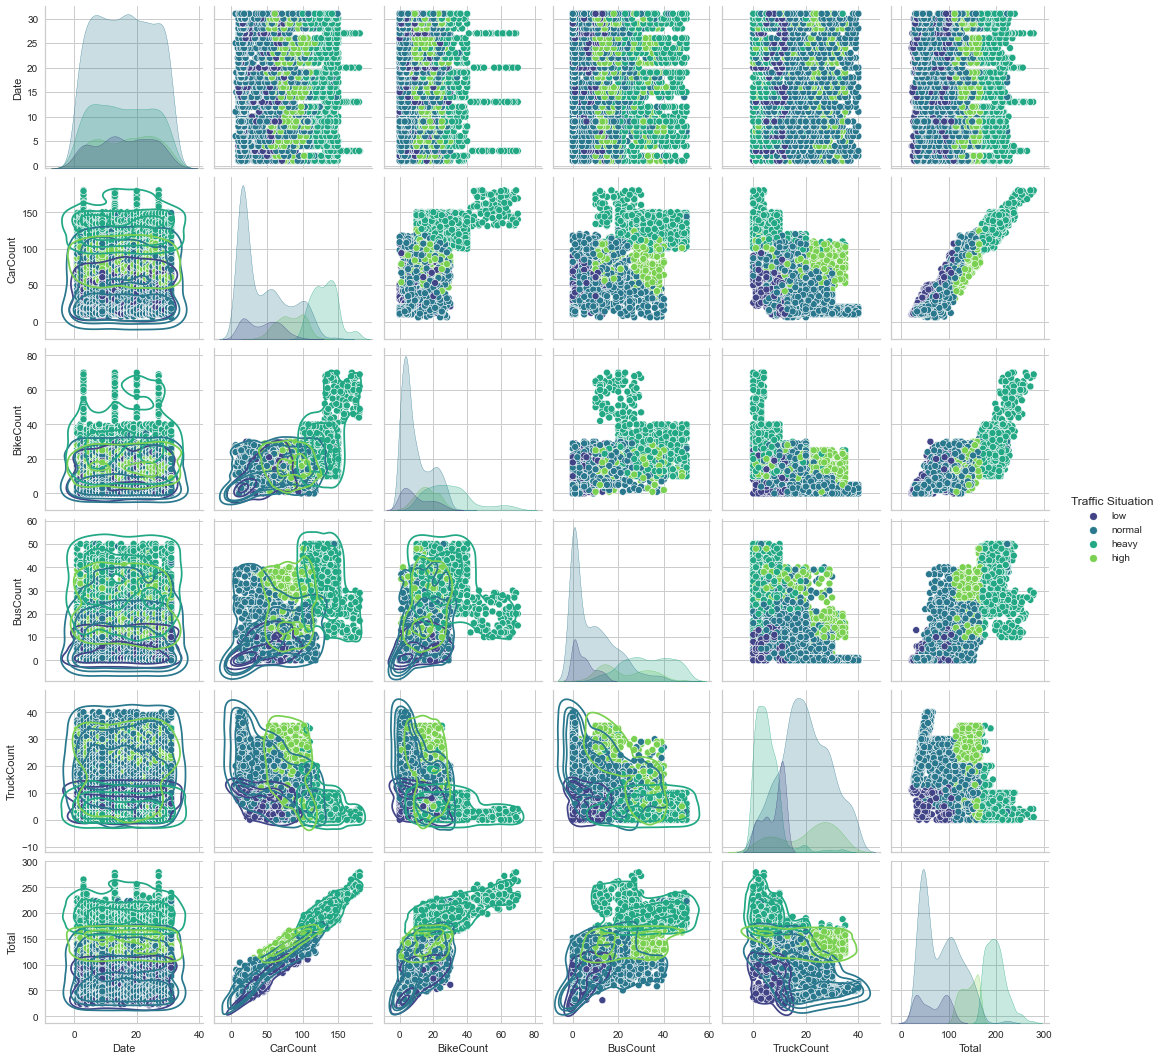

In [12]:
g = sns.pairplot(df, diag_kind="kde", hue='Traffic Situation', palette = 'viridis')
g.map_lower(sns.kdeplot, levels=4, color=".3")
plt.grid(False)
plt.show()

### Encoder

In [6]:
lb = LabelEncoder()
df['Traffic Situation'] = lb.fit_transform(df['Traffic Situation'])
df['Day of the week'] = lb.fit_transform(df['Day of the week'])
df['Hour'] = lb.fit_transform(df['Hour'])

df.drop('Date', inplace = True, axis = 1)
df.drop('Time', inplace = True, axis = 1)
df.drop('Total', inplace = True, axis = 1)

df.head(1)

,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Traffic Situation,Hour
0,5,31,0,4,4,2,22


### Modeling and Evaluation

In [7]:
X_M = df.drop('Traffic Situation', axis = 1)
Y_M = df['Traffic Situation']
scaler = MinMaxScaler()
x = scaler.fit_transform(X_M) 

### Train Test Split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(x, Y_M, test_size=0.3, random_state=42)

### Logistic Regression

In [111]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_model.score(X_train, y_train)
model_pred_L = logistic_model.predict(X_test)

print(classification_report(y_test, model_pred_L))
print("accuracy: ",accuracy_score(y_test, model_pred_L))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_L))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_L))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90       197
           1       0.79      0.42      0.55        88
           2       0.79      0.47      0.59        93
           3       0.86      0.94      0.90       515

    accuracy                           0.85       893
   macro avg       0.82      0.70      0.73       893
weighted avg       0.84      0.85      0.83       893

accuracy:  0.845464725643897
mean_absolute_error:  0.23068309070548712
mean_squared_error:  0.41881298992161253


### Random Forest Classifier

In [112]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_model.score(X_train, y_train)
model_pred_R = random_forest_model.predict(X_test)

print(classification_report(y_test, model_pred_R))
print("accuracy: ",accuracy_score(y_test, model_pred_R))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_R))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_R))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       197
           1       0.88      0.83      0.85        88
           2       0.99      0.97      0.98        93
           3       0.97      0.97      0.97       515

    accuracy                           0.96       893
   macro avg       0.94      0.94      0.94       893
weighted avg       0.96      0.96      0.96       893

accuracy:  0.9574468085106383
mean_absolute_error:  0.07950727883538634
mean_squared_error:  0.17357222844344905


### Decision Tree

In [113]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_model.score(X_train, y_train)
model_pred_T = decision_tree_model.predict(X_test)

print(classification_report(y_test, model_pred_T))
print("accuracy: ",accuracy_score(y_test, model_pred_T))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_T))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_T))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       197
           1       0.81      0.82      0.81        88
           2       0.94      0.90      0.92        93
           3       0.96      0.96      0.96       515

    accuracy                           0.94       893
   macro avg       0.91      0.91      0.91       893
weighted avg       0.94      0.94      0.94       893

accuracy:  0.9361702127659575
mean_absolute_error:  0.10750279955207166
mean_squared_error:  0.21724524076147816


### SVC

In [114]:
model_SVC = SVC(kernel = 'rbf' ,random_state = 42)
model_SVC.fit(X_train, y_train)
model_SVC.score(X_train, y_train)
model_SVC_Pred = model_SVC.predict(X_test)

print(classification_report(y_test, model_SVC_Pred))
print("accuracy: ",accuracy_score(y_test, model_SVC_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_SVC_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_SVC_Pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       197
           1       0.85      0.73      0.79        88
           2       0.91      0.84      0.87        93
           3       0.95      0.94      0.95       515

    accuracy                           0.92       893
   macro avg       0.90      0.87      0.88       893
weighted avg       0.92      0.92      0.92       893

accuracy:  0.9204927211646137
mean_absolute_error:  0.12989921612541994
mean_squared_error:  0.2597984322508399


### KNeighborsClassifier

In [118]:
model_NEG = KNeighborsClassifier(n_neighbors=4)
model_NEG.fit(X_train, y_train)
model_NEG.score(X_train, y_train)
model_NEG_Pred = model_NEG.predict(X_test)

print(classification_report(y_test, model_NEG_Pred))
print("accuracy: ",accuracy_score(y_test, model_NEG_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_NEG_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_NEG_Pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       197
           1       0.77      0.75      0.76        88
           2       0.71      0.91      0.80        93
           3       0.96      0.88      0.91       515

    accuracy                           0.88       893
   macro avg       0.83      0.87      0.85       893
weighted avg       0.89      0.88      0.89       893

accuracy:  0.8846584546472565
mean_absolute_error:  0.18365061590145576
mean_squared_error:  0.3628219484882419


3    515
0    197
2     93
1     88
Name: Traffic Situation, dtype: int64


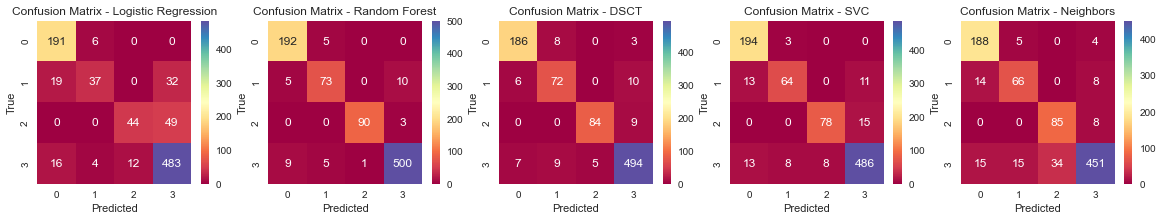

In [119]:
RLOG = confusion_matrix(y_test, model_pred_L)
RMFC = confusion_matrix(y_test, model_pred_R)
DSCT = confusion_matrix(y_test, model_pred_T)
SVC_ = confusion_matrix(y_test, model_SVC_Pred)
NEG = confusion_matrix(y_test, model_NEG_Pred)

fig, axes = plt.subplots(1, 5, figsize=(20, 3))

sns.heatmap(RLOG, annot=True, cmap='Spectral', fmt='g', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(RMFC, annot=True, cmap='Spectral', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

sns.heatmap(DSCT, annot=True, cmap='Spectral', fmt='g', ax=axes[2])
axes[2].set_title('Confusion Matrix - DSCT')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

sns.heatmap(SVC_, annot=True, cmap='Spectral', fmt='g', ax=axes[3])
axes[3].set_title('Confusion Matrix - SVC')
axes[3].set_xlabel('Predicted')
axes[3].set_ylabel('True')

sns.heatmap(NEG, annot=True, cmap='Spectral', fmt='g', ax=axes[4])
axes[4].set_title('Confusion Matrix - Neighbors')
axes[4].set_xlabel('Predicted')
axes[4].set_ylabel('True')

print(y_test.value_counts())
plt.show()

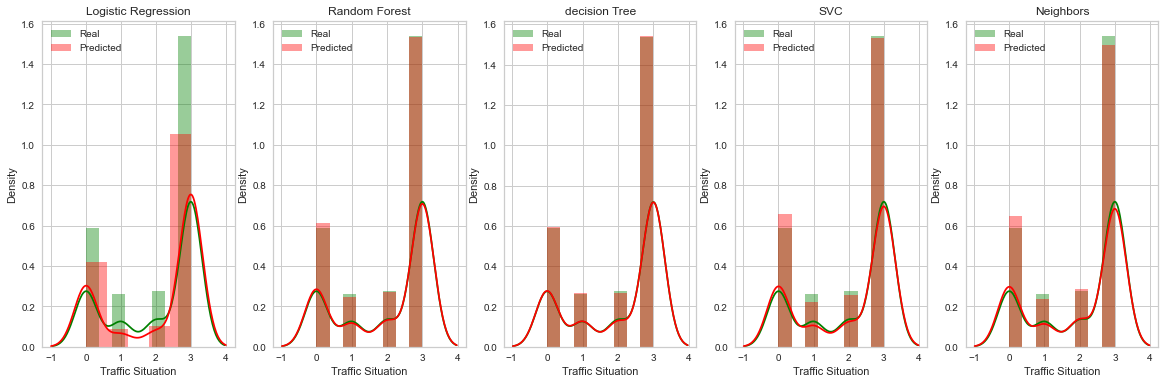

In [117]:
fig, ax = plt.subplots(1, 5, figsize=(20, 6))

sns.distplot(y_test, label='Real', ax=ax[0], color = 'Green')
sns.distplot(model_pred_L, label='Predicted', ax=ax[0],  color = 'red')

sns.distplot(y_test, label='Real', ax=ax[1], color = 'Green')
sns.distplot(model_pred_R, label='Predicted', ax=ax[1], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[2], color = 'Green')
sns.distplot(model_pred_T, label='Predicted', ax=ax[2], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[3], color = 'Green')
sns.distplot(model_SVC_Pred, label='Predicted', ax=ax[3], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[4], color = 'Green')
sns.distplot(model_NEG_Pred, label='Predicted', ax=ax[4], color = 'red')


ax[0].set_title('Logistic Regression')
ax[1].set_title('Random Forest')
ax[2].set_title('decision Tree')
ax[3].set_title('SVC')
ax[4].set_title('Neighbors')

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
plt.show()